In [1]:
try:
    import shapely
except:
    !pip install shapely

In [2]:
import json
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

plt.rcParams["figure.figsize"] = (10,10)

<h1> Problem visualisation
    

In [3]:
def loadJSON(instance_name):
    # Load the instance json
    with open(f'instances/{instance_name}.json', 'r') as f:
        instance = json.load(f)
        
    return instance

# Mapper for object coordinates to tuple
def pointMap(o):
    return (o["x"], o["y"])

def displayPolygon(instance_name):
    instance = loadJSON(instance_name)

    outer_boundary = instance["outer_boundary"]
    outer_boundary = list(map(pointMap, outer_boundary))
    
    # Plot the outer boundary of the polygon
    x,y = Polygon(outer_boundary).exterior.xy
    plt.plot(x,y);
    
    # Plot the inner boundaries of the polygon
    holes = instance["holes"]
    for hole in holes:
        inner_boundary = list(map(pointMap, hole))
        
        x,y = Polygon(inner_boundary).exterior.xy
        plt.plot(x,y);
        plt.xticks([])
        plt.yticks([])

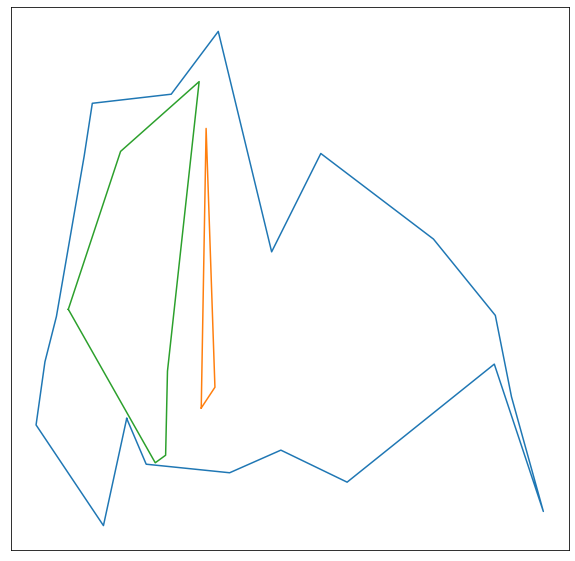

In [4]:
# Insert the name of the instance to be visualized
instance_name = "fpg-poly_0000000020_h2.instance"
displayPolygon(instance_name)

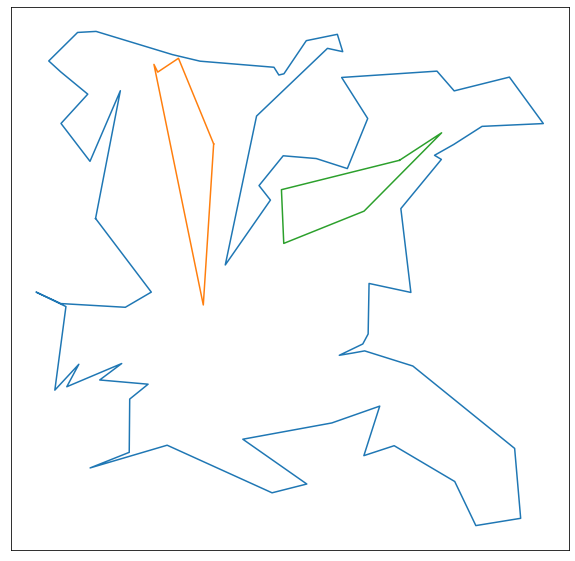

In [5]:
instance_name = "fpg-poly_0000000070_h2.instance"
displayPolygon(instance_name)

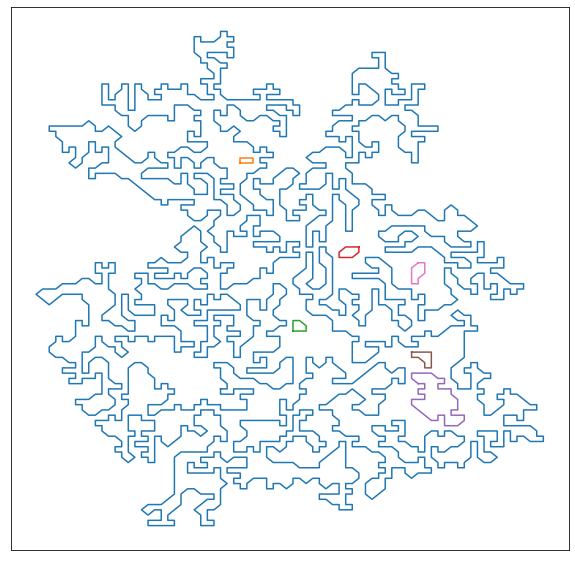

In [6]:
instance_name = "srpg_octa_mc0001647.instance"
displayPolygon(instance_name)

<h1>Constrained Delaunay Triangulations

In [7]:
try:
    import triangle
except:
    !pip install triangle
    
import triangle as tr

In [8]:
def getTriangleData(instance_name):
    index = 0
    vertices = []
    holes = []
    segments = []
    instance = loadJSON(instance_name)

    outer_boundary = instance["outer_boundary"]
    outer_boundary = list(map(pointMap, outer_boundary))
    
    for idx, v in enumerate(outer_boundary):
        vertices.append([v[0], v[1]])
        if idx == len(outer_boundary) - 1:
             # Connect the last vertex to the first vertex of the outer_boundary
            segments.append([idx, 0])
        else:
            segments.append([idx, idx + 1])
            
        index += 1
        
    offset = len(outer_boundary)
    for hole in instance["holes"]:
        x = []
        y = []
        inner_boundary = list(map(pointMap, hole))
        for idx, v in enumerate(inner_boundary):
            vertices.append([v[0], v[1]])
            x.append(v[0])
            y.append(v[1])
            
            if idx == len(inner_boundary) - 1:
                # Connect the last vertex to the first vertex of this inner boundary
                segments.append([index, index - len(inner_boundary) + 1])
            else:
                segments.append([index, index + 1])
                
            index += 1
            
        # Calculate the centroid of the hole
        centroid = [sum(x) / len(inner_boundary), sum(y) / len(inner_boundary)]
        holes.append(centroid)
                    
    return vertices, holes, segments


def plotDelaunay(instance_name):
    triangleData = getTriangleData(instance_name)
    vertices = {
        'vertices': triangleData[0],
        'holes': triangleData[1],
        'segments': triangleData[2]
    }
    t = tr.triangulate(vertices, 'p')
    tr.compare(plt, vertices, t)
    plt.gcf().set_size_inches(30, 20)
    plt.show()

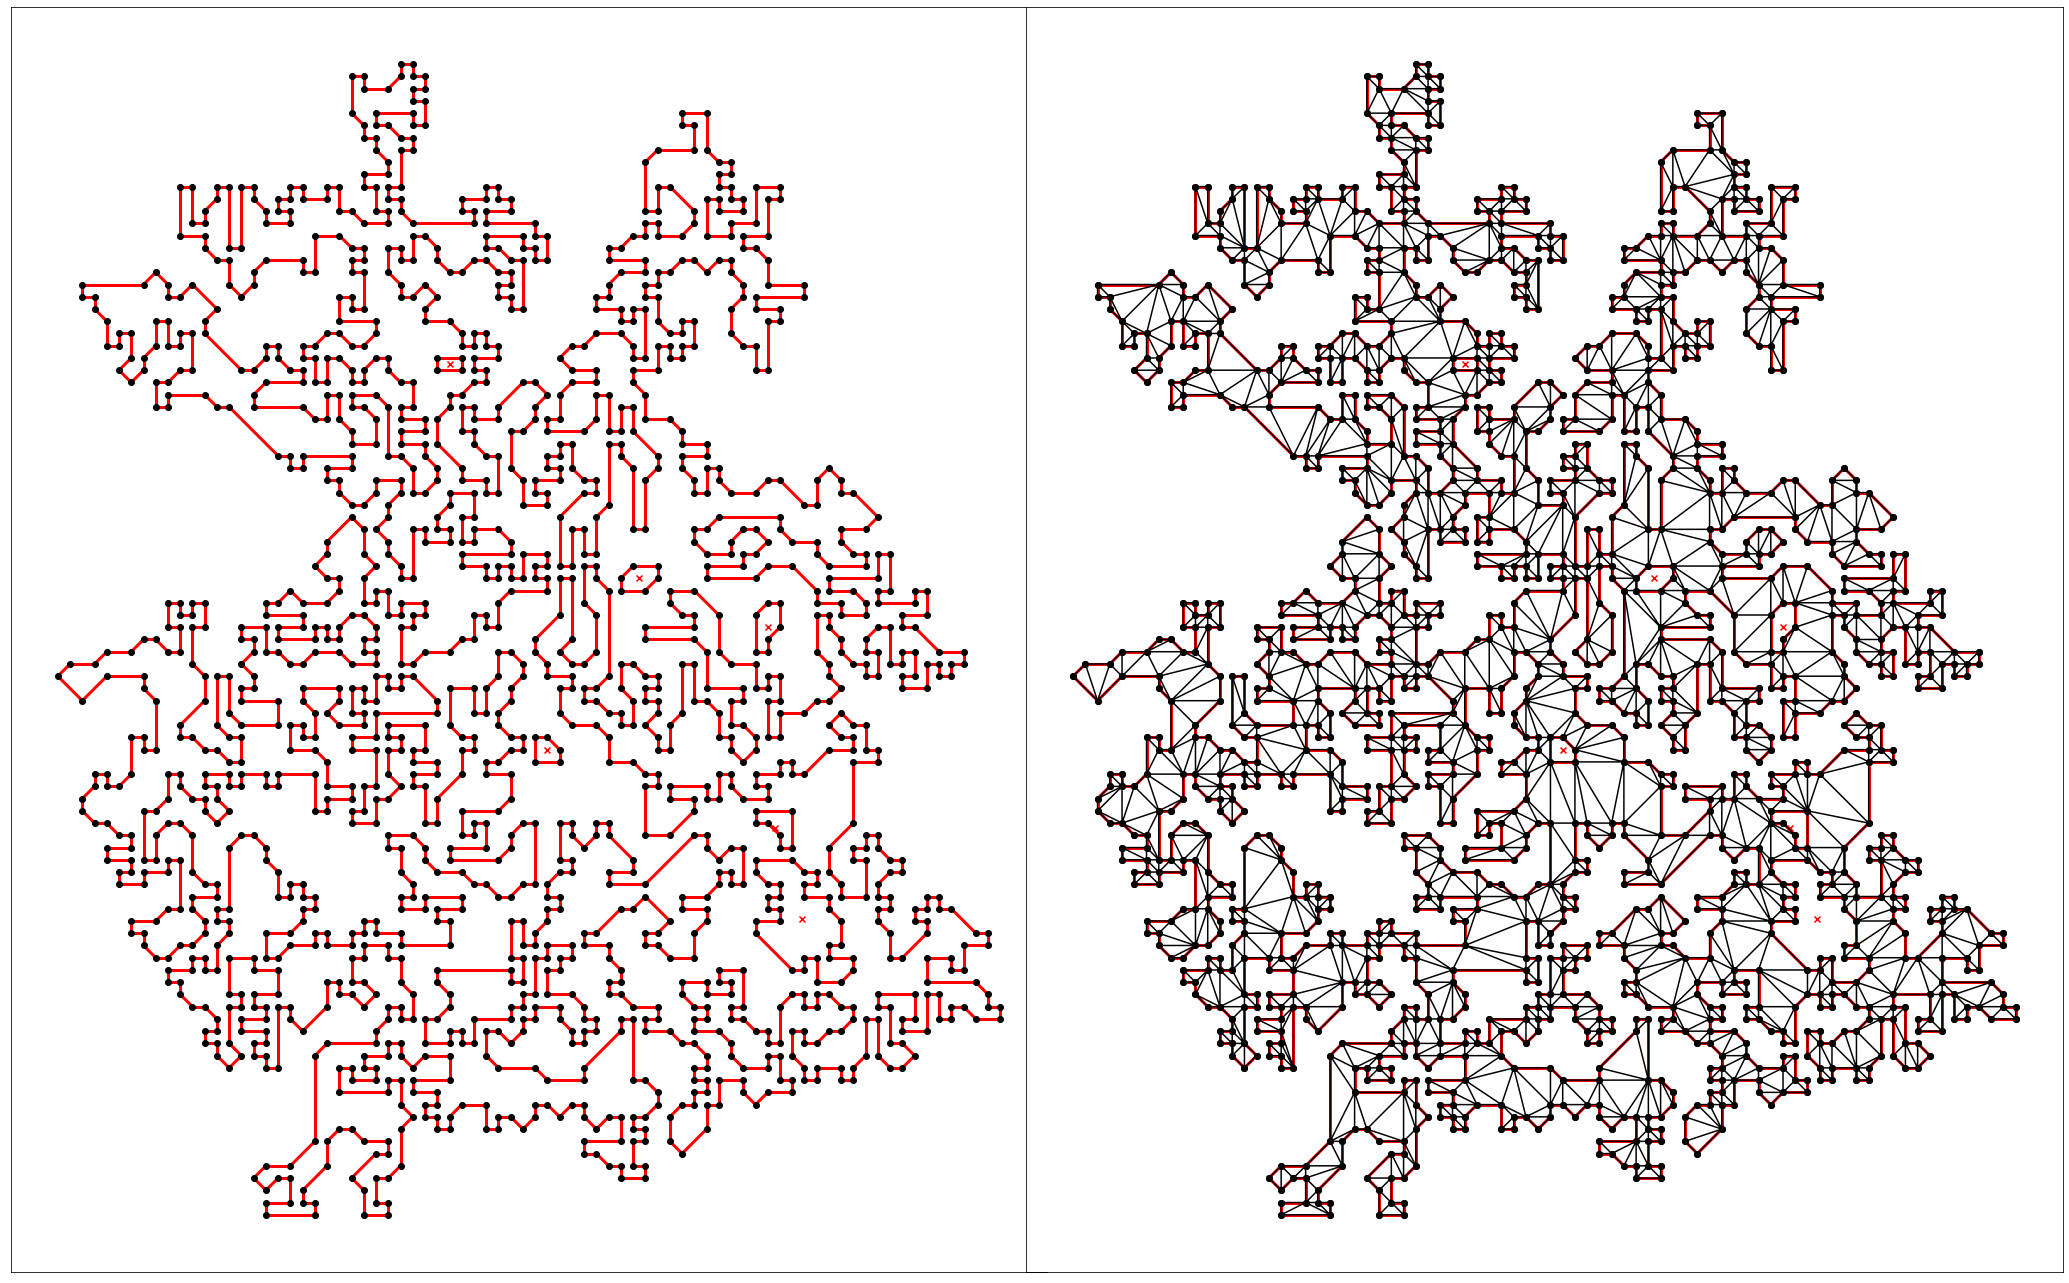

In [9]:
instance_name = "srpg_octa_mc0001647.instance"
plotDelaunay(instance_name)

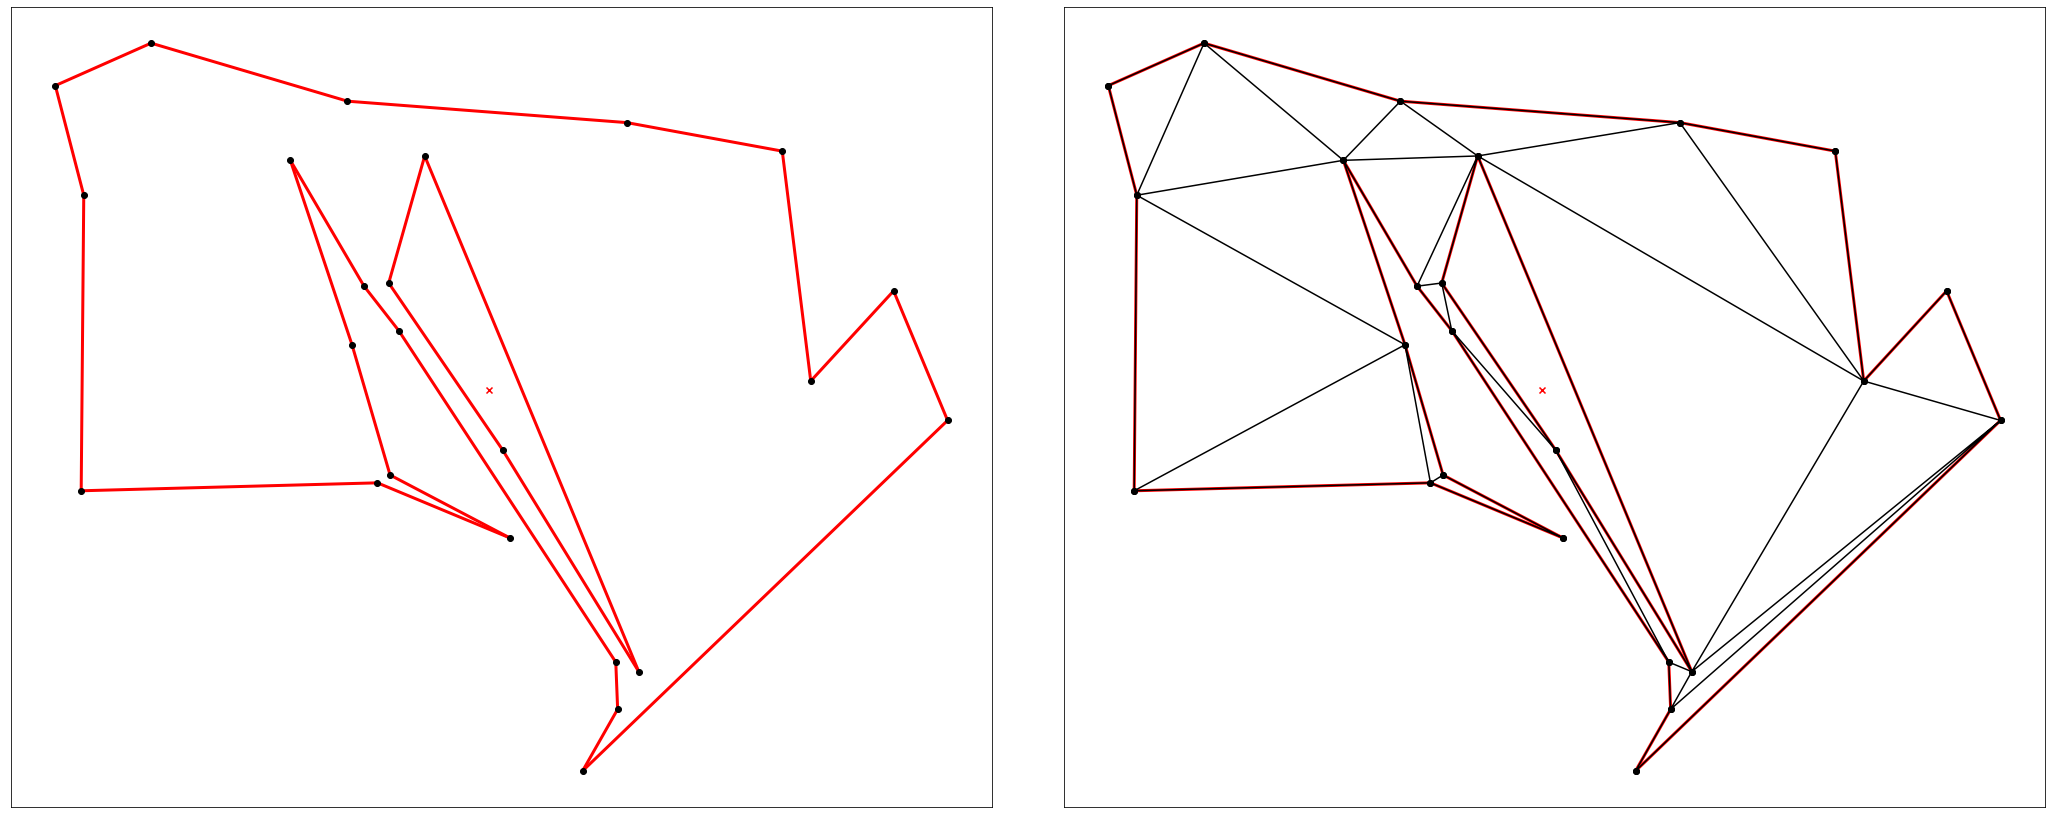

In [12]:
instance_name = "fpg-poly_0000000020_h1.instance"
plotDelaunay(instance_name)

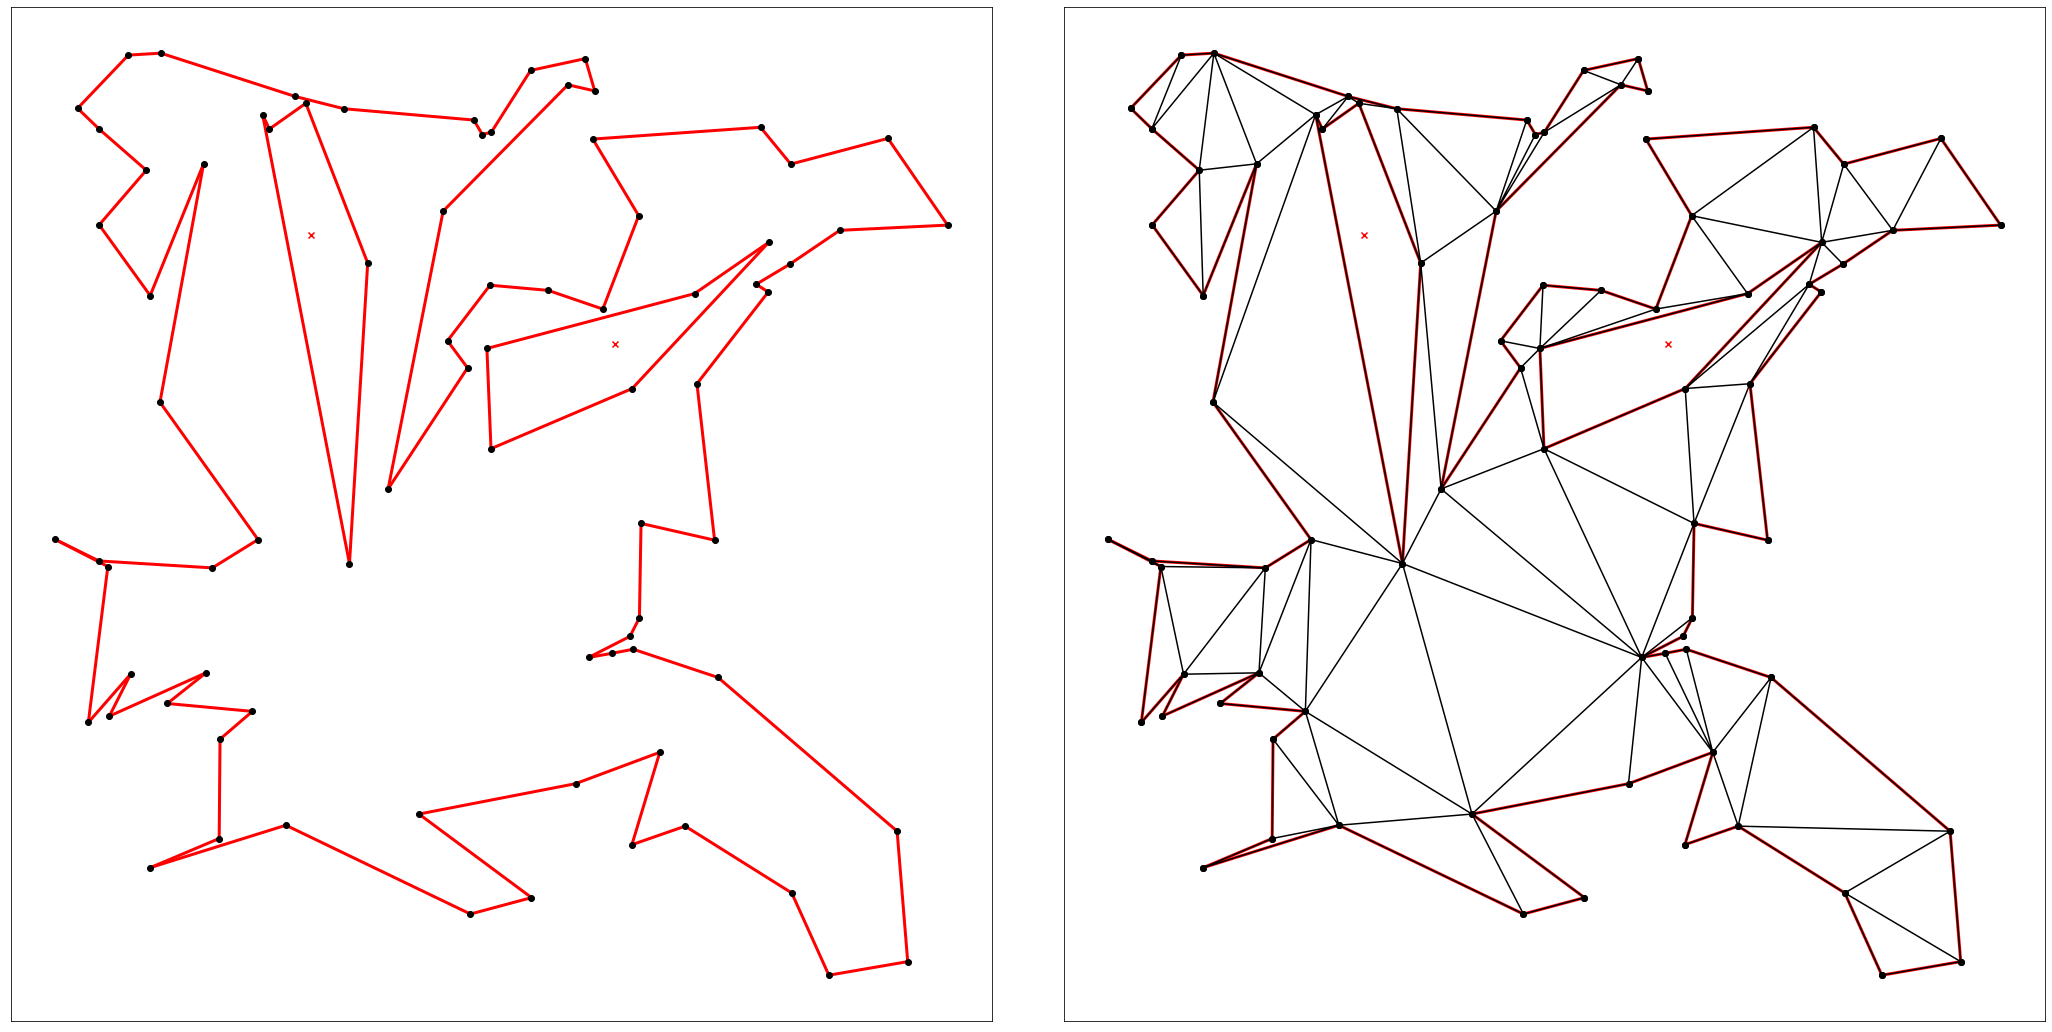

In [11]:
instance_name = "fpg-poly_0000000070_h2.instance"
plotDelaunay(instance_name)